In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rfpimp

import utils
from data_statistical_features import Segment, SegmentStatistical
import eda_utils

import os

plt.rcParams.update(utils.get_plt_settings())

save=True

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Data

In [3]:
df = pd.read_csv(utils.get_own_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10, data_folder='data_patients'), index_col=False)
features = df.drop(Segment.get_feature_name_array(), axis='columns')
informative_inf = df[Segment.get_feature_name_array()]

df.columns = [col.replace("_", " ") for col in df.columns]
features.columns = [col.replace("_", " ") for col in features.columns]
informative_inf.columns = [col.replace("_", " ") for col in informative_inf.columns]

target = df['informative']
patient_id = df['patient id']

from ml_statistical_features import get_patient_split
x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.33)
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

# Correlation Heatmap

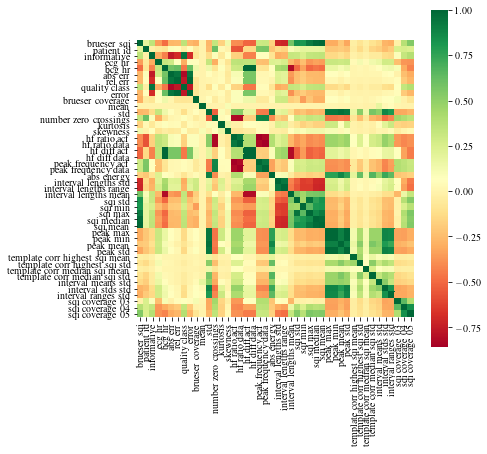

In [7]:
width, _ = utils.get_plt_normal_size()
plt.figure(figsize=(width*1.5, width*1.5))

sns.heatmap(df.loc[x_train.index].corr(), square=True, cmap ="RdYlGn", xticklabels=True, yticklabels=True)

In [5]:
corr_colls = eda_utils.get_correlated_columns(features, 0.95)
corr_colls

['hf diff data', 'sqi max', 'sqi mean', 'peak min', 'peak mean', 'peak std']

In [6]:
fdm = rfpimp.feature_dependence_matrix(x_train)

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm, figsize=(15, 15), value_fontsize=8, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [ ]:
fdm_new = rfpimp.feature_dependence_matrix(x_train[features_new.columns])

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm_new, figsize=(15, 15), value_fontsize=8, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [ ]:
fdm_reduced = rfpimp.feature_dependence_matrix(x_train.drop(['peak frequency data', 'peak frequency acf', 'peak max',
                                                             'abs energy'
                                                            ],
                                                            axis='columns'))

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm_reduced, figsize=(15, 15), value_fontsize=8, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [ ]:
x_train.drop(['maximum', 'minimum', 'mean signal envelope', 'mad','variance local minima', 'variance local maxima',
              'iqr', 'range', 'peak frequency data', 'peak frequency acf', 'peak max', 'abs energy'
             ], axis='columns').columns

# Paarweise geplottet

In [ ]:
cols = ['hf ratio acf', 'peak frequency acf', 'brueser coverage', 'abs energy', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)


In [ ]:
cols = ['interval lengths std', 'interval lengths range', 'interval lengths mean', 'error', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)


In [ ]:
cols = ['sqi std', 'sqi min', 'sqi max', 'brueser sqi', 'error', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)

In [ ]:
cols = ['peak max','peak min', 'peak mean', 'error', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)

# Einfluss der Merkmale bei Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from estimators import OwnEstimatorRegression, OwnEstimatorClassification

In [ ]:
# forest_regr = RandomForestRegressor(random_state=1, n_jobs=-2, verbose=1)
forest_regr = None

rf_regr = OwnEstimatorRegression(forest_regr, path='rf_regr_2010.sav')

In [ ]:
rf_regr.print_model_test_report()

In [ ]:
rf_regr.print_regression_test_report()

In [ ]:
importances = rf_regr.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_regr.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30, rf_regr.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_regr.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_regr.features.columns)), [name.replace("_", " ") for name in rf_regr.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_regr.features.columns)])
plt.tight_layout()
plt.show()

In [ ]:
features = ['mean', 'std', 'number_zero_crossings', 'kurtosis', 'skewness',
            'hf_ratio_acf', 'hf_ratio_data', 'hf_diff_acf', 'hf_diff_data',
           'interval_lengths_std', 'interval_lengths_range',
           'interval_lengths_mean', 'sqi_std', 'sqi_min', 'sqi_max', 'sqi_median',
           'sqi_mean', 'peak_min', 'peak_mean', 'peak_std',
           'template_corr_highest_sqi_mean', 'template_corr_highest_sqi_std',
           'template_corr_median_sqi_mean', 'template_corr_median_sqi_std',
           'interval_means_std', 'interval_stds_std', 'interval_ranges_std',
           'sqi_coverage_03', 'sqi_coverage_04', 'sqi_coverage_05']
forest_regr_reduced = RandomForestRegressor(random_state=1, n_jobs=-2, verbose=1)
rf_regr_reduced = OwnEstimatorRegression(forest_regr_reduced, path='rf_regr_2210_reduced.sav', feature_selection=features)

In [ ]:
rf_regr_reduced.print_model_test_report()
rf_regr_reduced.print_regression_test_report()

In [ ]:
importances = rf_regr_reduced.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_regr_reduced.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30,rf_regr_reduced.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_regr_reduced.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_regr_reduced.features.columns)), [name.replace("_", " ") for name in rf_regr_reduced.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_regr_reduced.features.columns)])
plt.tight_layout()
plt.show()

In [ ]:
features = ['mean', 'std', 'number_zero_crossings', 'kurtosis', 'skewness',
            'hf_ratio_acf', 'hf_ratio_data', 'hf_diff_acf', 'hf_diff_data',
           'interval_lengths_std', 'interval_lengths_range',
           'interval_lengths_mean', 'sqi_std', 'sqi_min', 'sqi_max', 'sqi_median',
           'sqi_mean', 'peak_min', 'peak_mean', 'peak_std',
           'template_corr_highest_sqi_mean', 'template_corr_highest_sqi_std',
           'template_corr_median_sqi_mean', 'template_corr_median_sqi_std',
           'interval_means_std', 'interval_stds_std', 'interval_ranges_std',
           'sqi_coverage_03', 'sqi_coverage_04', 'sqi_coverage_05']
forest_clf_reduced = RandomForestClassifier(random_state=1, n_jobs=-2, verbose=1)
rf_clf_reduced = OwnEstimatorClassification(forest_clf_reduced, path='rf_clf_2210_reduced.sav', feature_selection=features)

In [ ]:
rf_clf_reduced.print_model_test_report()

In [ ]:
x1, x2, y1, y2, groups1, groups2 = rf_clf_reduced._get_patient_split()
plt.figure(figsize=utils.get_plt_normal_size())
x2 = x2.dropna()
y2 = y2.loc[x2.index]
plot_roc_curve(rf_clf_reduced.clf, x2, y2)

In [ ]:
importances = rf_clf_reduced.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_clf_reduced.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30,rf_clf_reduced.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_clf_reduced.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_clf_reduced.features.columns)), [name.replace("_", " ") for name in rf_clf_reduced.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_clf_reduced.features.columns)])
plt.tight_layout()
plt.show()

In [ ]:
# forest = RandomForestClassifier(random_state=1, n_jobs=-2)
forest = None

rf_clf = OwnEstimatorClassification(forest, path='rf_clf_2010.sav')

In [ ]:
rf_clf.print_model_test_report()

In [ ]:
forest_5 = RandomForestClassifier(random_state=1, n_jobs=-2)
#forest_5 = None

rf_clf_5 = OwnEstimatorClassification(forest_5, path='rf_clf_5_2010.sav')

In [ ]:
importances = rf_clf.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_clf.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30, rf_clf.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_clf.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_clf.features.columns)), [name.replace("_", " ") for name in rf_clf.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_clf.features.columns)])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

from ml_statistical_features import get_patient_split

In [ ]:
std_scaler = StandardScaler()

x1, x2, y1, y2, groups1, groups2 = get_patient_split(features, target, patient_id, test_size=0.33)

mask = x1.dropna().index
y1 = y1.loc[mask]
x_std = std_scaler.fit_transform(x1.dropna())

In [ ]:
pca = KernelPCA(n_components=2)
x_transform = pca.fit_transform(x_std)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
pca = KernelPCA(n_components=2, kernel='cosine')
x_transform = pca.fit_transform(x_std)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(x_std, y1)
x_lda = clf.transform(x_std)
df_lda = pd.DataFrame(x_lda)
df_lda['informative'] = y1.values

sns.pairplot(df_lda, kind='scatter', hue='informative')

In [ ]:
from sklearn.linear_model import ElasticNet

x_train_std = std_scaler.transform(x_train.dropna(axis='index'))
mtl = ElasticNet()
mtl.fit(x_train_std, y_train_regr)

y_pred = mtl.predict(x_std)

y_pred_label = np.array([err < 10 for err in y_pred])
y_true_label = np.array([err < 10 for err in y_true])

ConfusionMatrixDisplay(confusion_matrix(y_true_label, y_pred_label), display_labels=class_names).plot()
print(classification_report(y_true_label, y_pred_label, target_names=class_names))

In [ ]:
pca = KernelPCA(n_components=2, kernel='rbf')
x_transform = pca.fit_transform(x_std)

df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
x_nca = nca.fit_transform(x_std, y_test)

df_nca = pd.DataFrame(x_lda)
df_nca['informative'] = y_test.values

sns.pairplot(df_nca, kind='scatter', hue='informative')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train_regr)
# transform train input data
X_train_fs = fs.transform(x_train)

importances = fs.scores_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()